In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bigmartsales.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Missing values are large - we carry out imputation
# Item Weight - Replace with Mean
# Outlet Size - Replace with mode

In [7]:
df["Item_Weight"].mean()

12.857645184136183

In [11]:
df["Item_Weight"].fillna(value=df["Item_Weight"].mean(), inplace = True)

In [12]:
df["Item_Weight"].head(10)

0     9.300000
1     5.920000
2    17.500000
3    19.200000
4     8.930000
5    10.395000
6    13.650000
7    12.857645
8    16.200000
9    19.200000
Name: Item_Weight, dtype: float64

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df["Outlet_Size"].mode()[0]

'Medium'

In [17]:
df["Outlet_Size"].fillna(value=df["Outlet_Size"].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
# There are no more missing values.

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df["Item_Identifier"].nunique()

1559

In [22]:
df["Item_Identifier"] = df["Item_Identifier"].apply(lambda x : x[0:2])

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df["Item_Identifier"]= df["Item_Identifier"].map({"FD":"FOOD","DR":"DRINK","NC":"NON_CONSUMABLE"})

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRINK,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FOOD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FOOD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NON_CONSUMABLE,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
df["Item_Fat_Content"].nunique()

5

In [27]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [28]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].map({"Low Fat":"LOW FAT","LF":"LOW FAT","low fat":"LOW FAT","Regular":"REGULAR","reg":"REGULAR"})

In [29]:
df["Item_Fat_Content"].unique()

array(['LOW FAT', 'REGULAR'], dtype=object)

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRINK,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FOOD,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FOOD,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NON_CONSUMABLE,8.93,LOW FAT,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
df["Outlet_Identifier"].nunique()

10

In [32]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [33]:
df["Outlet_Size"] = df["Outlet_Size"].map({"High":3,"Medium":2,"Small":1})

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRINK,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FOOD,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FOOD,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NON_CONSUMABLE,8.93,LOW FAT,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

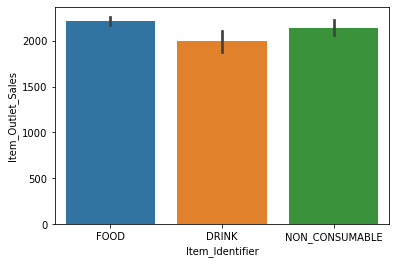

In [36]:
# Effect of Item_Identifier on Item Outlet sales
sns.barplot(x="Item_Identifier",y="Item_Outlet_Sales",data=df)

In [40]:
df["Outlet_Establishment_Year"].nunique()

9

In [41]:
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

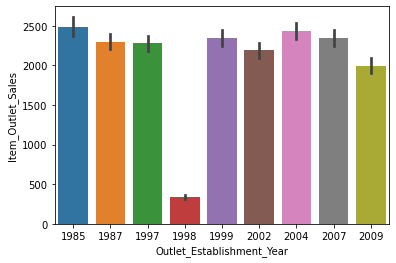

In [44]:
# Effect of Outlet establishment year on Item Outlet sales
sns.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

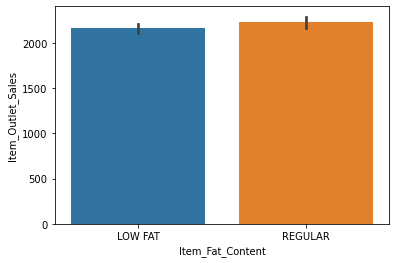

In [46]:
# Effect of Item fat content on Item Outlet sales
sns.barplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

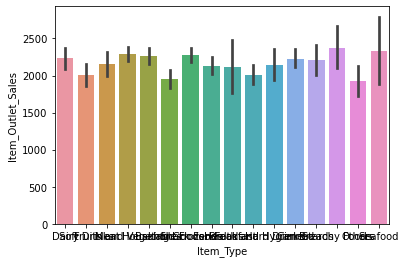

In [48]:
# Effect of Item type on Item outlet sales
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

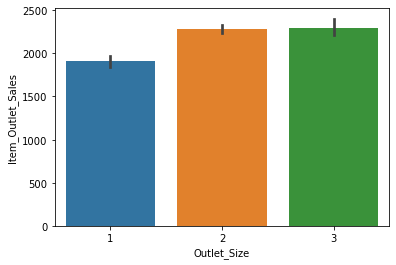

In [49]:
# Effect of Outlet size on item outlet sales
sns.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

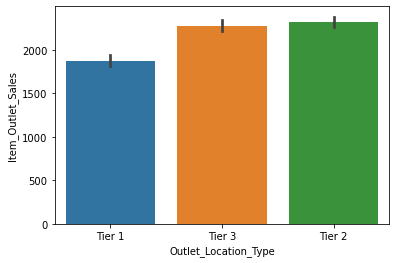

In [50]:
# Effect of Outlet location type on item outlet sales
sns.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

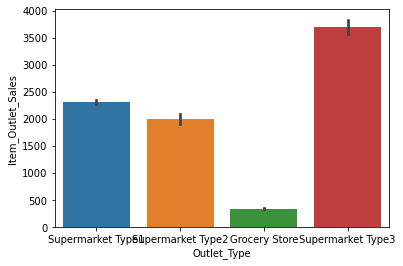

In [51]:
# Effect of Outlet type on item outlet sales
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)

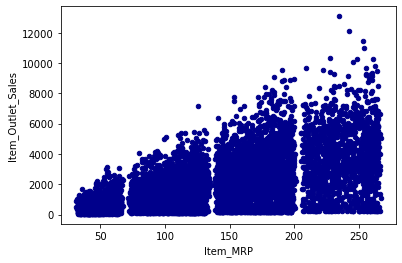

In [52]:
# Effectof Item MRP on item outlet sales
ax1= df.plot.scatter(x="Item_MRP",y="Item_Outlet_Sales",c="DarkBlue")

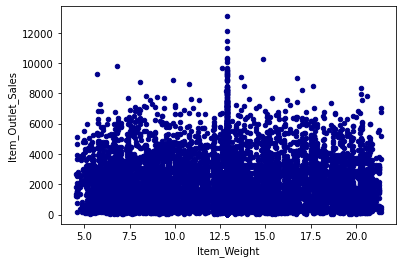

In [53]:
# Effectof Item Weight on item outlet sales
ax1= df.plot.scatter(x="Item_Weight",y="Item_Outlet_Sales",c="DarkBlue")

In [54]:
df = pd.get_dummies(df,drop_first=True)

In [55]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_FOOD,Item_Identifier_NON_CONSUMABLE,Item_Fat_Content_REGULAR,Item_Type_Breads,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,2,3735.1380,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,443.4228,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2,2097.2700,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,732.3800,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,3,994.7052,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [56]:
# Separate the input and output features

x=df.drop("Item_Outlet_Sales",axis=1)
y=df[["Item_Outlet_Sales"]]

In [57]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Identifier_FOOD,Item_Identifier_NON_CONSUMABLE,Item_Fat_Content_REGULAR,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,2,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,3,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [58]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [59]:
#KNN model with scaling
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
X_train.shape

(6818, 37)

In [62]:
X_test.shape

(1705, 37)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scalar = MinMaxScaler()

In [67]:
X_train_s = scalar.fit_transform(X_train)
X_test_s = scalar.transform(X_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
from sklearn.neighbors import KNeighborsRegressor
mse =[]
for i in range(1,20,2):
    model1 = KNeighborsRegressor(n_neighbors=i)
    model1.fit(X_train_s,y_train)
    ypred1=model1.predict(X_test_s)
    mse1 = mean_squared_error(y_test,ypred1)
    mse.append(mse1)

In [71]:
mse

[2185222.608404695,
 1483202.9736232047,
 1399046.7675083922,
 1374108.6042726545,
 1377556.194256079,
 1400976.7843796834,
 1426055.4588832175,
 1455077.447790006,
 1495905.6059832731,
 1516312.771615565]

Text(0.5, 1.0, 'Elbow curve')

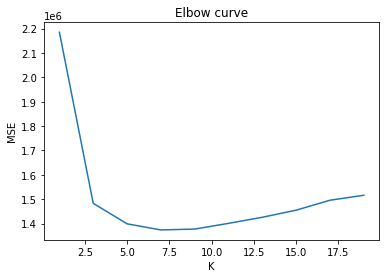

In [72]:
plt.plot(range(1,20,2),mse)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Elbow curve")

In [73]:
model1 = KNeighborsRegressor(n_neighbors=7)
model1.fit(X_train_s,y_train)
ypred1=model1.predict(X_test_s)

In [74]:
ypred1

array([[1117.40262857],
       [1163.53305714],
       [1525.44291429],
       ...,
       [1127.00917143],
       [1171.04708571],
       [1669.54105714]])